# Practice Project - 4

World Happiness Report



Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: 

GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

https://github.com/dsrscientist/DSData

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


"Happiness Score" is the target column based on the problem statement

In [3]:
df.info()   # Check df information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.dtypes # check df data types

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Observations: 
1. 'Country', 'Region', 'Happiness Rank' are categorical columns however 'Happiness Rank' data type is integer based on the discrete numbers in that column 
2. Data types for remainig columns is 'float' and they are correct as these columns contain continuous data

In [5]:
df.columns # checking columns names

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.shape  # checking the size of the dataset

(158, 12)

# Duplicate Values Check & Handling

In [7]:
# Check for duplicate values in the dataframe

In [8]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


Observations: No duplicate values present in the dataframe

# Null Values Handling

In [9]:
df.isnull(). sum()  # Checking the sum of null values for all columns

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Observations: No null values present in any of the columns

# Segregating columns based on data type for better EDA

In [10]:
# Dataframe of columns with Categorical X Data
df_categorical=df[['Country','Region','Happiness Rank']].copy()

In [11]:
df_categorical.columns

Index(['Country', 'Region', 'Happiness Rank'], dtype='object')

In [12]:
# Dataframe of columns with Continuous X Data
df_continuous=df.drop(['Country','Region','Happiness Rank','Happiness Score'],axis=1)

In [13]:
df_continuous.columns

Index(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [14]:
# Dataframe of column with Target Data
df_target=df["Happiness Score"].copy()

# Statistical Summary

In [15]:
# Statistical summary for continuous data
df_continuous.describe()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations:
1. Count: Same for all columns. Hence no null values are present
2. Mean < Median for columns (Left skewed): "Economy (GDP per Capita)", "Family","Health (Life Expectancy)" and "Freedom"
3. Mean > Median for columns (Right skewed): "Standard Error","Trust (Government Corruption)","Generosity" and "Dystopia Residual"
4. Small differences between 75 percentile and max for all columns, hene many outliers are not present
5. Standard deviation is small for all columns, hence data spread is less

In [16]:
# Statistical summary for categorical data
df_categorical.describe(include="O")

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


Observations:
1. count is same for all columns hence no null values are present
2. Unique values present in columns: Country --> 158, Region -->10
3. Mode of columns: Country --> Switzerland, Region -->Sub-Saharan Africa
4. Frequency of mode value of columns: Country --> 1, Region -->40

# Visualization of data

Visualization for categorical data

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


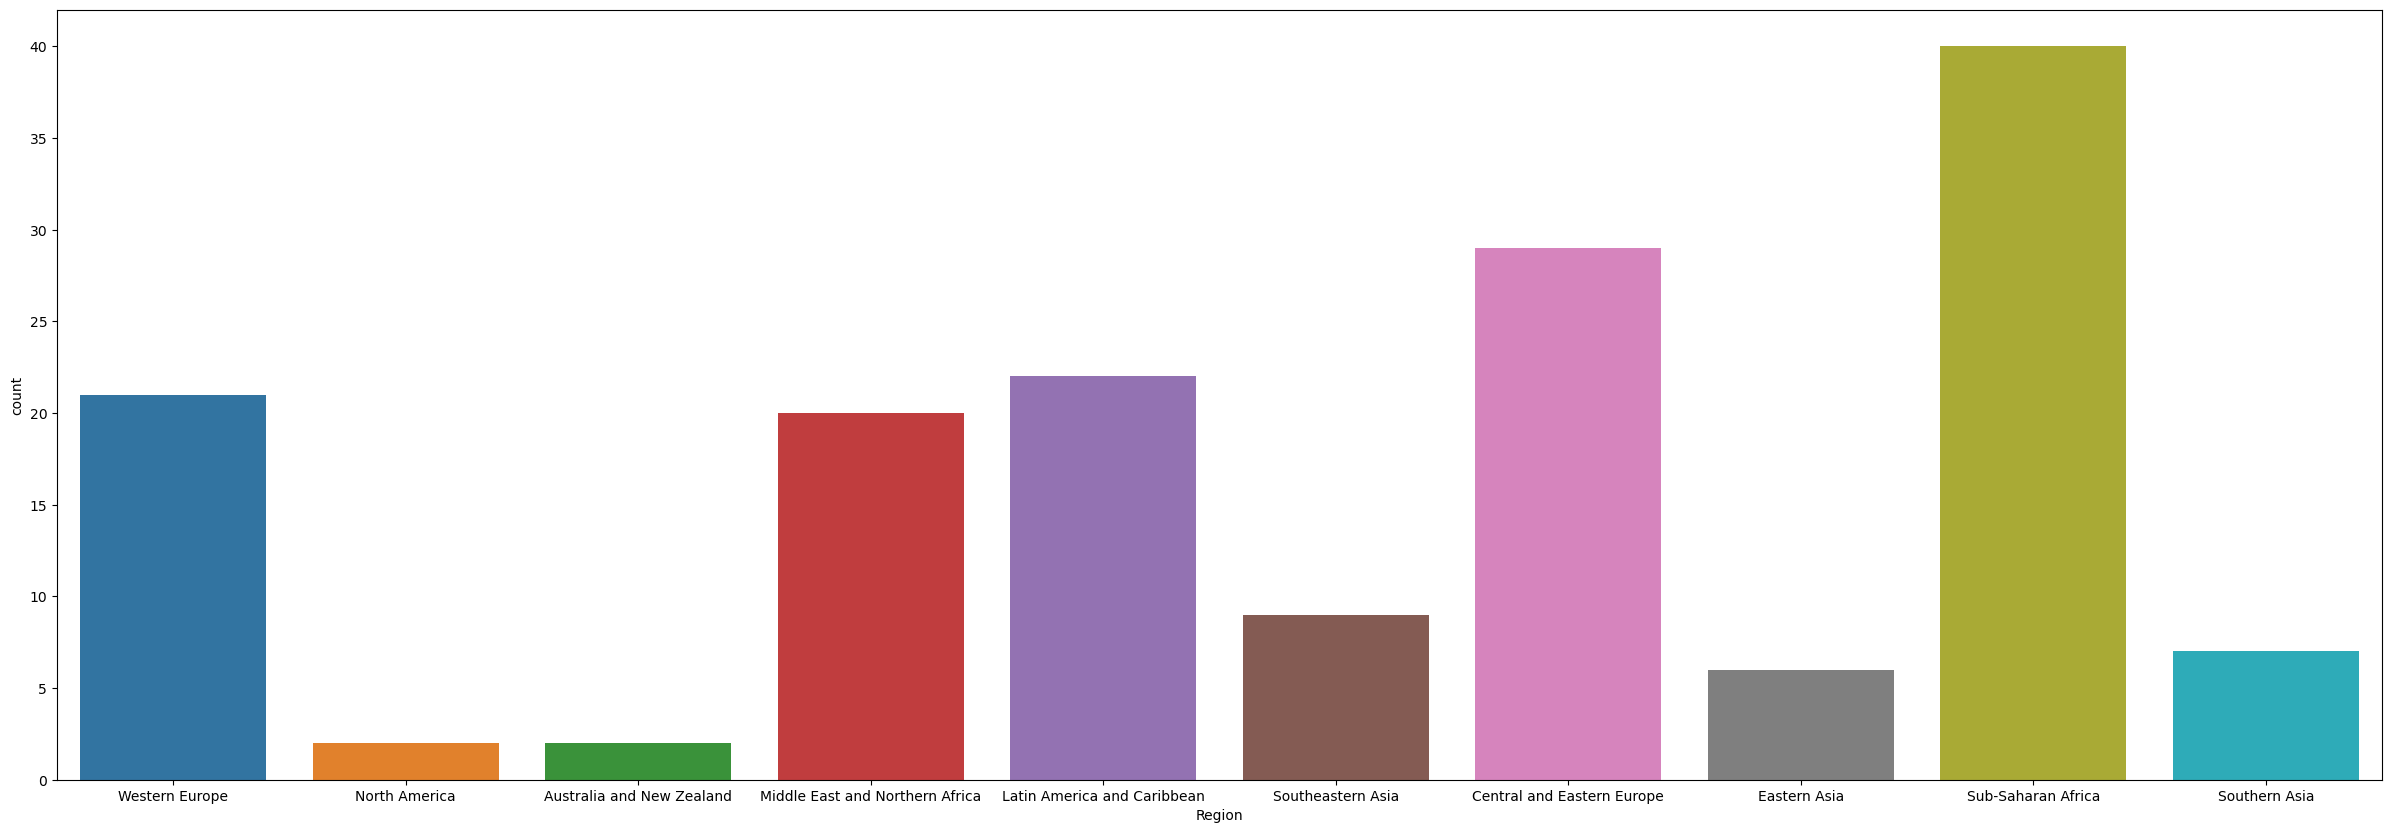

In [17]:
print(df_categorical["Region"].value_counts())
plt.figure(figsize=(30,10))
sns.countplot(df_categorical["Region"])
plt.show()

Observations: 
Out of all regions, "Sub-Saharan Africa" is reflected more times followed by "Central and Eastern Europe"

Visualization for continuous data

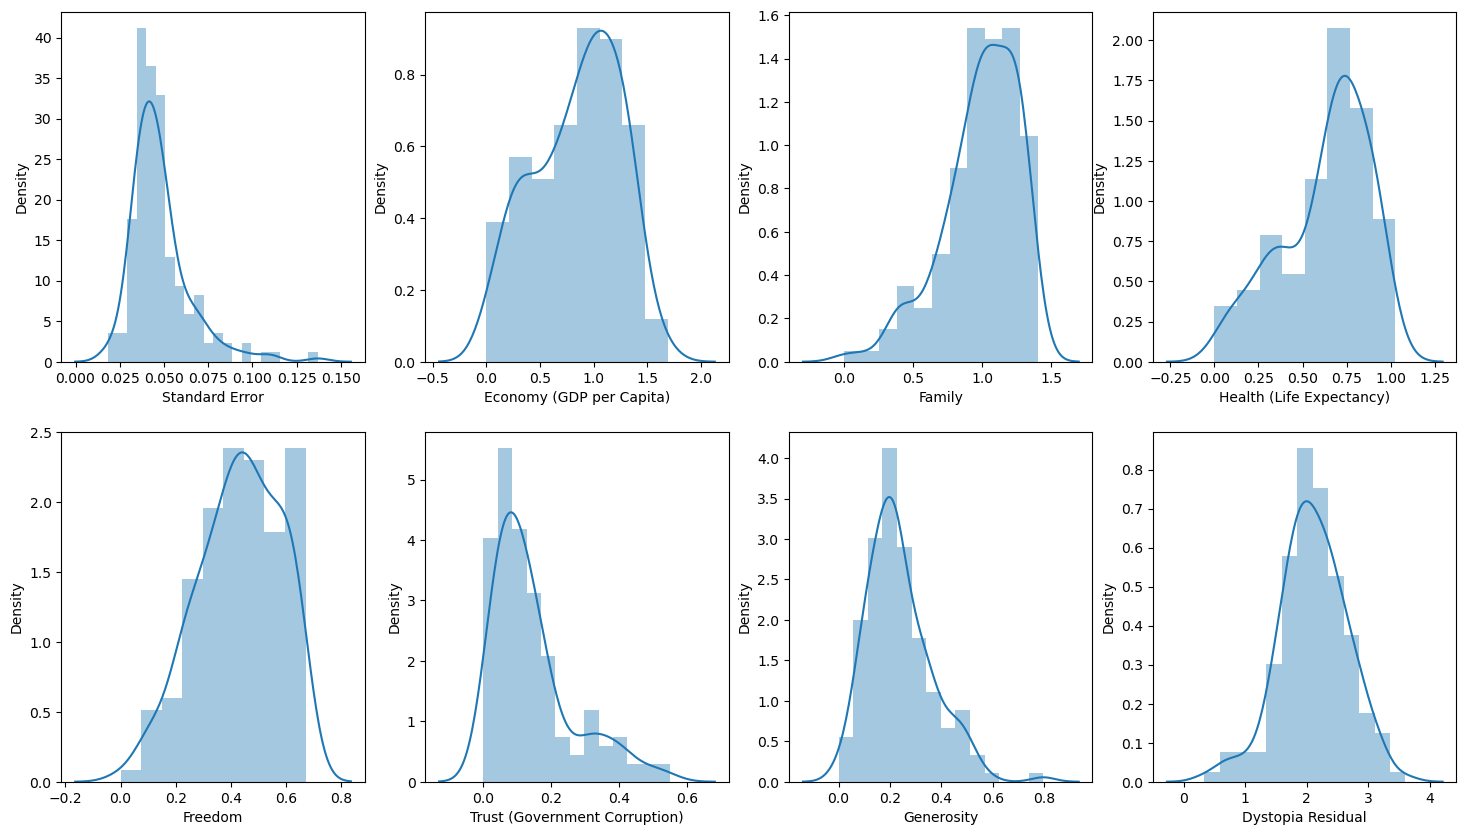

In [18]:
# Distribution Plots
features =['Standard Error','Economy (GDP per Capita)','Family',
          'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

plt.subplots(figsize=(18,10))
for i , col in enumerate(features):
    plt.subplot(2,4,i+1)
    sns.distplot(df[col])
plt.show()

Observations:
1. All the columns are not normally distributed. The building blocks are out of the normalized curve.
2. Features with right skewed data:'Standard Error','Trust (Government Corruption)','Generosity','Dystopia Residual' 
3. Features with left skewed data:'Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom'
4. Data spread is small in all the columns

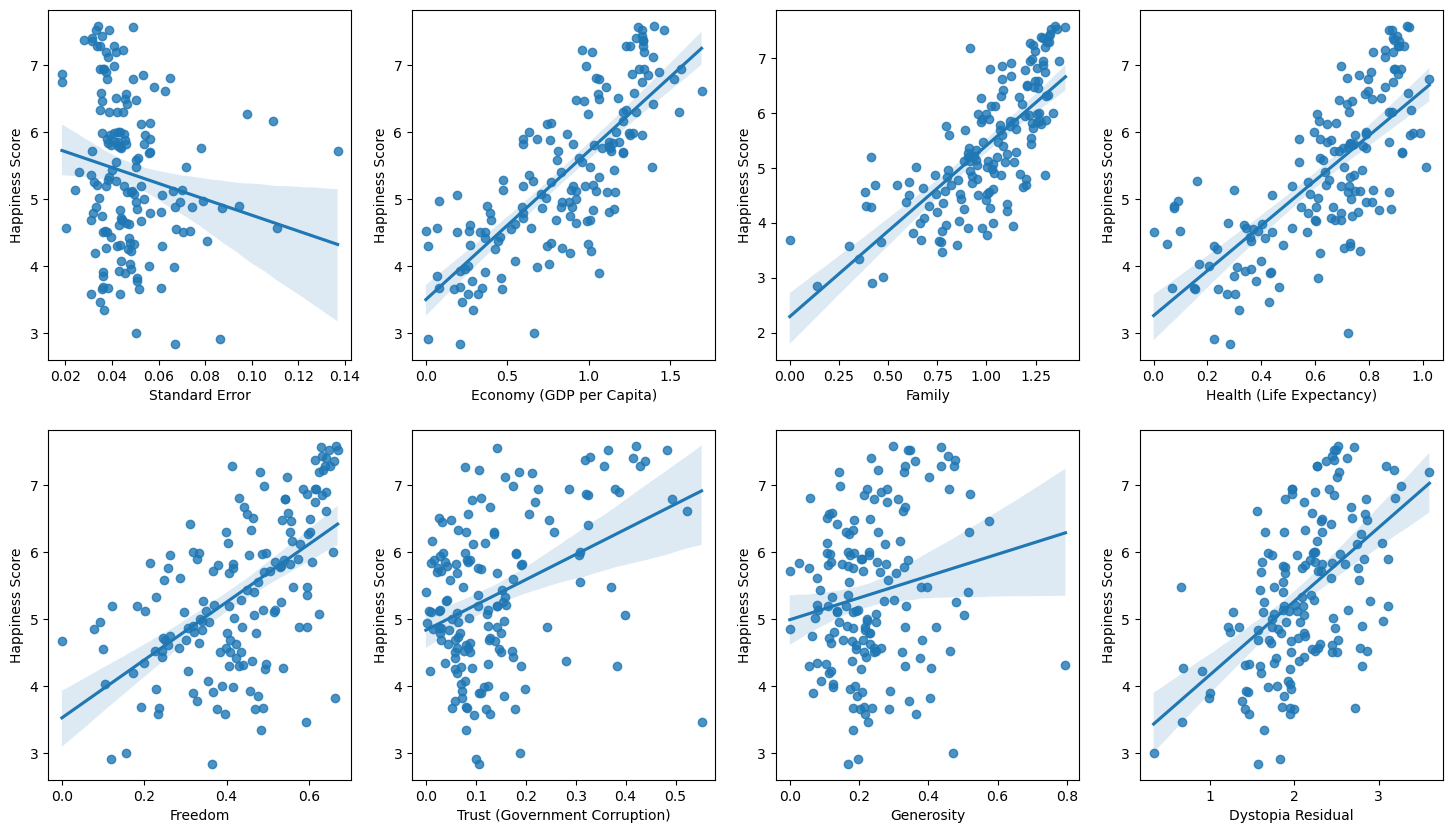

In [19]:
# Regression Plots
features =['Standard Error','Economy (GDP per Capita)','Family',
          'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

plt.subplots(figsize=(18,10))
for i ,col in enumerate(features):
    plt.subplot(2,4,i+1)
    sns.regplot(data=df,x=col,y='Happiness Score')
plt.show()

Observations:
1. 'Happiness Score' is decreasing with 'Standard Error'
2. 'Happiness Score' is increasing with 'Economy (GDP per Capita)','Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity' and 'Dystopia Residual'

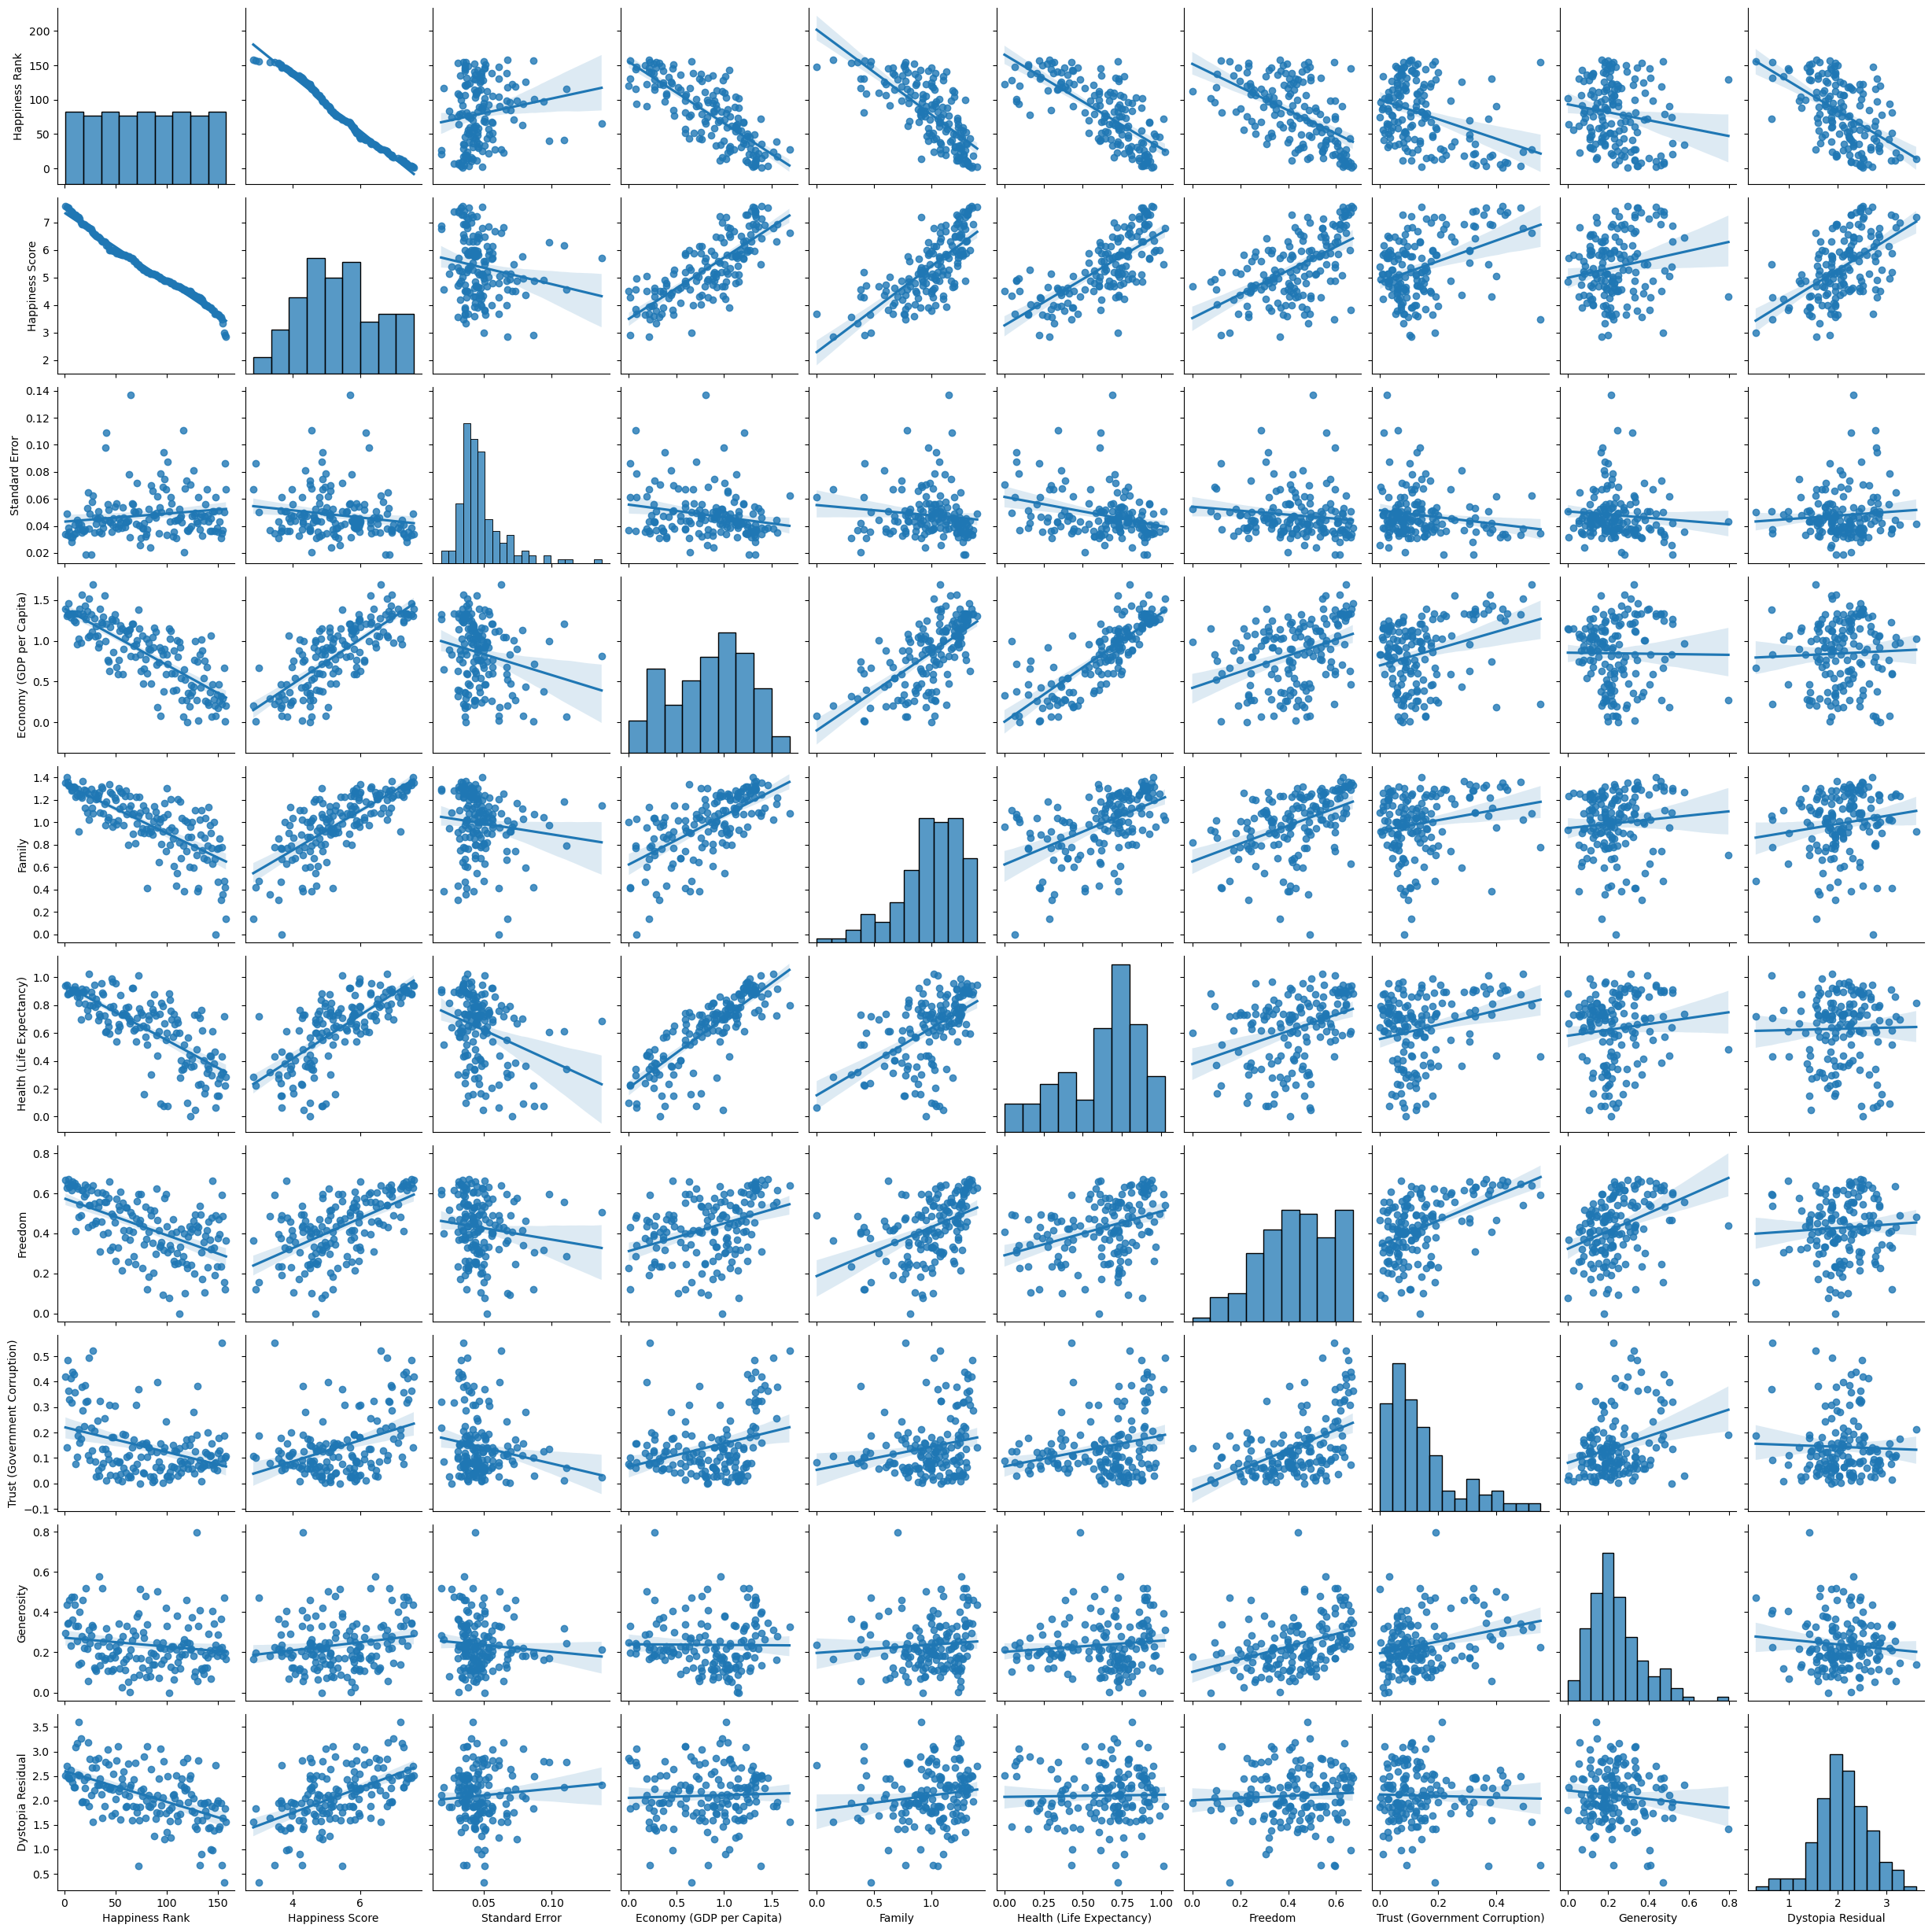

In [20]:
sns.pairplot(df,kind="reg")

Observations:
1. 'Happiness Rank' is decreasing with increasing in all other variables except for 'Standard Error' where marginal improvement in 'Happiness Rank' with increasing in 'Standard Error'
2. 'Happiness Score' is increasing with increasing in all other variables except for 'Standard Error' where marginal decrease in 'Happiness Score' with increasing in 'Standard Error'
3. 'Standard Error' is decreasing with increasing in all other variables except for 'Dystopia Residual' and 'Happiness Rank'
4. 'Economy (GDP per Capita)' is decreasing with 4 variables and increasing with 5 variables i.e. almost 50% positive and negative impact on 'Economy (GDP per Capita)' due to other variables
5. 'Family' scores are increasing with majority of the variables
6. 'Health (Life Expectancy)': Majority of the variables have positive relation with 'Health (Life Expectancy)'
7. 'Freedom': Majority of the variables have positive relation with 'Freedom'
8. 'Trust (Government Corruption)': Majority of the variables have positive relation with 'Trust (Government Corruption)'
9. 'Generosity': Half of the variables having positive relation and remaing have negative relation with 'Generosity'
10. 'Dystopia Residual': Amlost half of the variables have no significant relationship and remaining most of the variables have negative relationship with 'Dystopia Residual'

Visualization part is completed

# Encoding of Categorical Data

Using Ordinal Encoder to encode the data

In [21]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [22]:
# Encoding needed for columns "Country" and "Region" to change string data to numerical format
df_encode=df[["Country", "Region"]].copy()
df_encode.head(5)

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()  # creating instance for OrdinalEncoder

for i in df_encode.columns:
    df_encode[i]=enc.fit_transform(df_encode[i].values.reshape(-1,1))  # Transforming the data using OrdingalEncoder
df_encode.head(5)

,Country,Region
0,135.0,9.0
1,58.0,9.0
2,37.0,9.0
3,105.0,9.0
4,24.0,5.0


In [24]:
# Dropping columns "Country" and "Region" from original dataframe to add encoded columns
df.drop(["Country", "Region"],axis=1,inplace=True)
df.head(5)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [25]:
# Adding encoded columns to the original dataframe
df_n=pd.concat([df,df_encode],axis=1)
df_n.head(5)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country,Region
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,135.0,9.0
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,58.0,9.0
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,37.0,9.0
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,105.0,9.0
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,24.0,5.0


In [26]:
df=df_n
df.isnull().sum() # Making sure no null values with updated dataframe

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Country                          0
Region                           0
dtype: int64

# Checking coefficients of correlation (r)

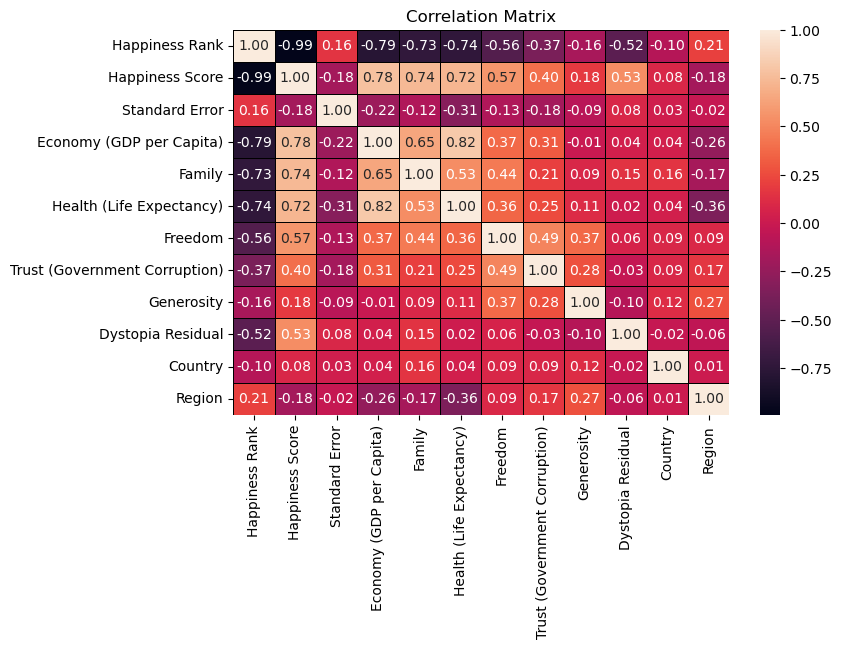

In [27]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.jpg")
plt.show()

In [28]:
corr_r["Happiness Score"].sort_values(ascending=False)  # Arranging the relationship of target variable with other variables in descending order

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

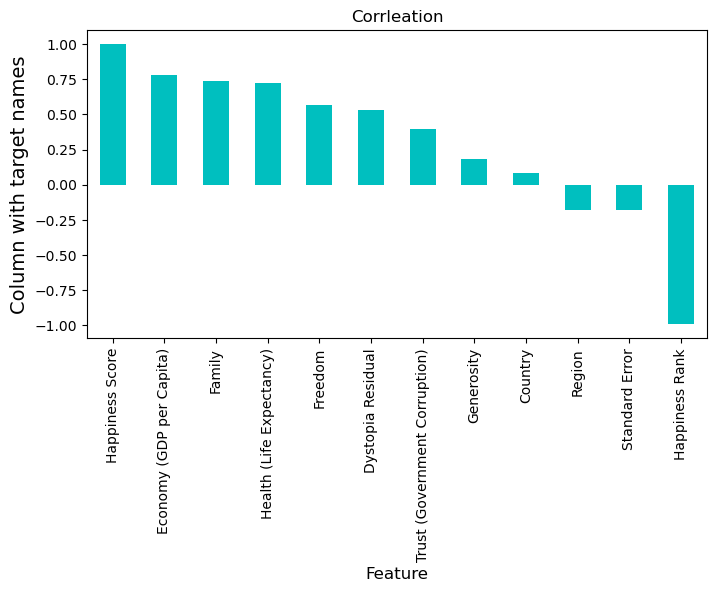

In [29]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(8,4))
corr_r["Happiness Score"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=12)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=12)
plt.show()

Observations: (Correlation of Target variable with features)
1. Max positive correlation: "Economy (GDP per Capita)"
2. Max negative correlation: "Happiness Rank"
3. Min positive correlation: "Country"
2. Max negative correlation: "Region" 
3. "Country" -->0.083380, "Generosity"-->0.180319, "Region"-->-0.176791 and "Standard Error"--> -0.177254 are very weak correlations. From this data, I will drop "Country" column from the dataset 
4. Typically -0.3 to +0.3 are considered as weak correlation however there are multiple columns having the relationship in this range with target variable hence removing only "Country" with almost zero correlation based on correlation table 
5. I will check top 10 features that have strong relationship with target variable using SelectKBest algorithm and will take a call to remove further columns based on the comparison between corrleation table scores Vs SelectKBest scores

In [30]:
# Dropping "Country" columns from the dataframe based on the correlation table
df.drop(["Country"],axis=1,inplace=True)
df.head(5)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,9.0
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,9.0
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,9.0
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,9.0
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,5.0


# Checking top 10 features using SelectKBest algorithm

In [31]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,9.0
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,9.0
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,9.0
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,9.0
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,5.0


In [32]:
import pandas as pd
import numpy as np

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


X=df.drop("Happiness Score",axis=1)  #independent columns
y=df["Happiness Score"]  # Output variable

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                           Specs        Score
0                 Happiness Rank  9763.219221
2       Economy (GDP per Capita)   243.904796
3                         Family   189.511934
4       Health (Life Expectancy)   172.051600
5                        Freedom    74.381954
8              Dystopia Residual    61.089434
6  Trust (Government Corruption)    28.873972
7                     Generosity     5.242772
1                 Standard Error     5.060341
9                         Region     5.033085


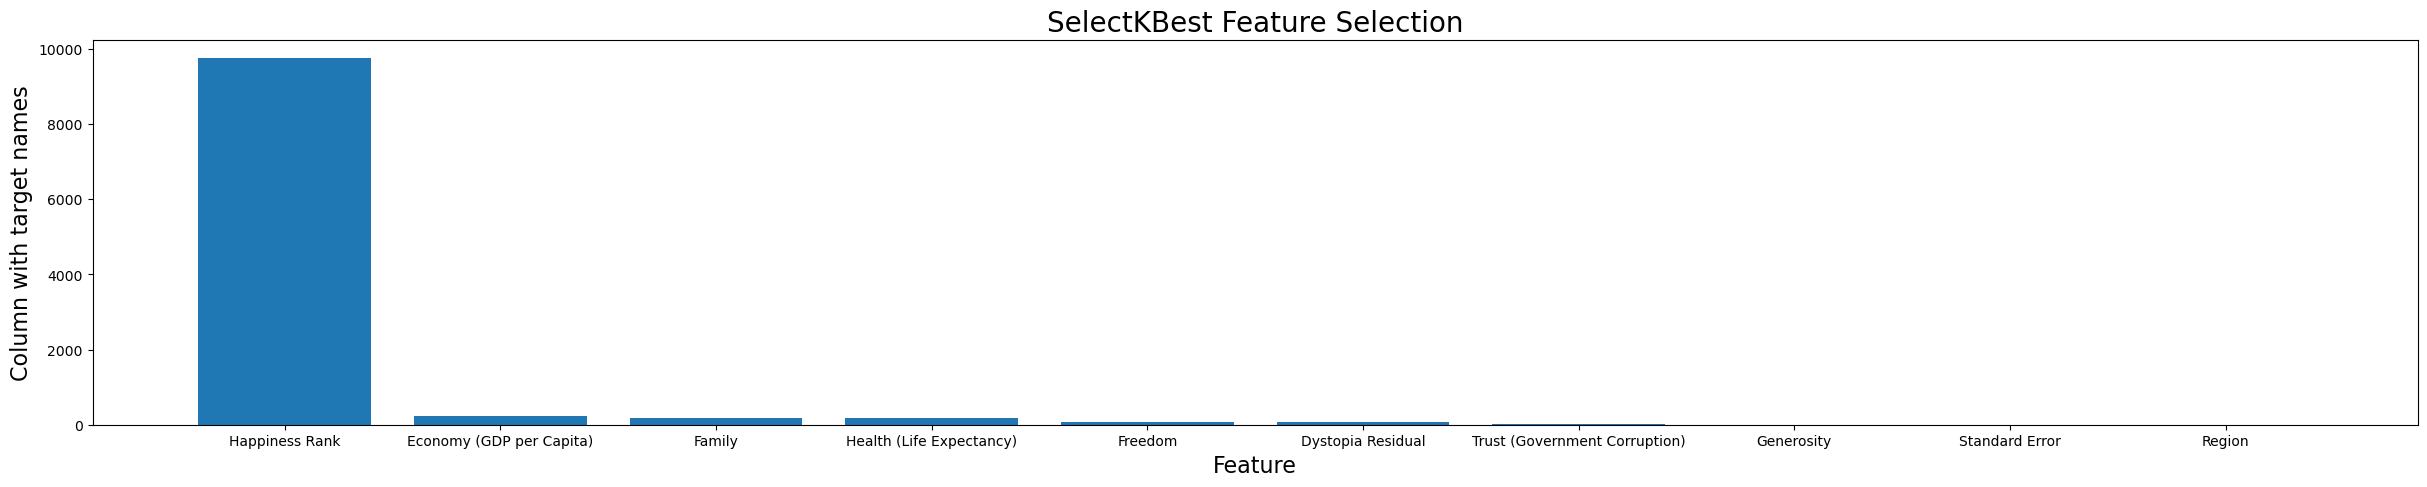

In [33]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(30,5))
plt.bar('Specs','Score',data=df_sorted_desc)
plt.xlabel("Feature",fontsize=16)
plt.ylabel("Column with target names",fontsize=16)
plt.title("SelectKBest Feature Selection",fontsize=20)
plt.show()

Observations: 
1. Generosity, Standard Error and Region are having lowest score values with target from SelectKBest method
2. Generosity, Standard Error and Region are having weak correlations with target in the range of -0.18 to +0.18 from correlation table
3. As both correlation table and feature scores based on selectKBest method are less for the features Generosity, Standard Error and Region, I will drop these columns from the dataset

In [34]:
# Dropping "Region" columns from the dataframe
df.drop(["Region","Generosity","Standard Error"],axis=1,inplace=True)
df.head(5)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176


# Checking multi-Collinearity using VIF

In [35]:
# We don't check VIF on categorical data hence checking on continuous data

# Dataframe of columns with Continuous X Data
df_continuous=df.drop(['Happiness Rank','Happiness Score'],axis=1)
df_continuous

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,1.83302


In [36]:
# We don't check VIF on categorical data hence checking on continuous data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_continuous[list(df_continuous.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,24.071686,Family
2,21.544113,Health (Life Expectancy)
0,19.761289,Economy (GDP per Capita)
3,14.091196,Freedom
5,9.942098,Dystopia Residual
4,3.379265,Trust (Government Corruption)


Observations: 
1. Typically we remove columns with VIF values > 5 which indicates strong multicollinearity of the features
2. As there are multiple features (5) with VIF values > 5, hence dropping only one column "Family" in this case as the data loss will be more due to smaller dataset

In [37]:
# Dropping "Family" columns from the entire dataframe
df.drop(["Family"],axis=1,inplace=True)
df.head(5)

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1,7.587,1.39651,0.94143,0.66557,0.41978,2.51738
1,2,7.561,1.30232,0.94784,0.62877,0.14145,2.70201
2,3,7.527,1.32548,0.87464,0.64938,0.48357,2.49204
3,4,7.522,1.45900,0.88521,0.66973,0.36503,2.46531
4,5,7.427,1.32629,0.90563,0.63297,0.32957,2.45176


In [38]:
# Dropping "Family" columns from the dataframe with continuous data
df_continuous.drop(["Family"],axis=1,inplace=True)
df_continuous.head(5)

,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1.39651,0.94143,0.66557,0.41978,2.51738
1,1.30232,0.94784,0.62877,0.14145,2.70201
2,1.32548,0.87464,0.64938,0.48357,2.49204
3,1.45900,0.88521,0.66973,0.36503,2.46531
4,1.32629,0.90563,0.63297,0.32957,2.45176


In [39]:
# Rechecking VIF on continuous data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_continuous[list(df_continuous.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,21.424315,Health (Life Expectancy)
0,16.906335,Economy (GDP per Capita)
2,11.719243,Freedom
4,7.460195,Dystopia Residual
3,3.332244,Trust (Government Corruption)


Observations:
1. VIF score is reduced after dropping "Family" column however there are still some more columns with VIF score > 5
2. But not dropping any other columns as the data loss will be more due to smaller dataset

# Pre-Processing

In [40]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Dystopia Residual'],
      dtype='object')

In [41]:
# Segregating only X data
x=df.drop("Happiness Score",axis=1)

In [42]:
x.head(5)

,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1,1.39651,0.94143,0.66557,0.41978,2.51738
1,2,1.30232,0.94784,0.62877,0.14145,2.70201
2,3,1.32548,0.87464,0.64938,0.48357,2.49204
3,4,1.45900,0.88521,0.66973,0.36503,2.46531
4,5,1.32629,0.90563,0.63297,0.32957,2.45176


In [43]:
# Segregating only Y data
y=df["Happiness Score"]
y.head(5)

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# Checking Outliers

In [44]:
# We don't remove outliers of categorical X columns and in target variable, hence checking outliers for continuous X features

# Dataframe of columns with Continuous X Data
df_continuous=x.drop(['Happiness Rank'],axis=1)
df_continuous.columns

Index(['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')

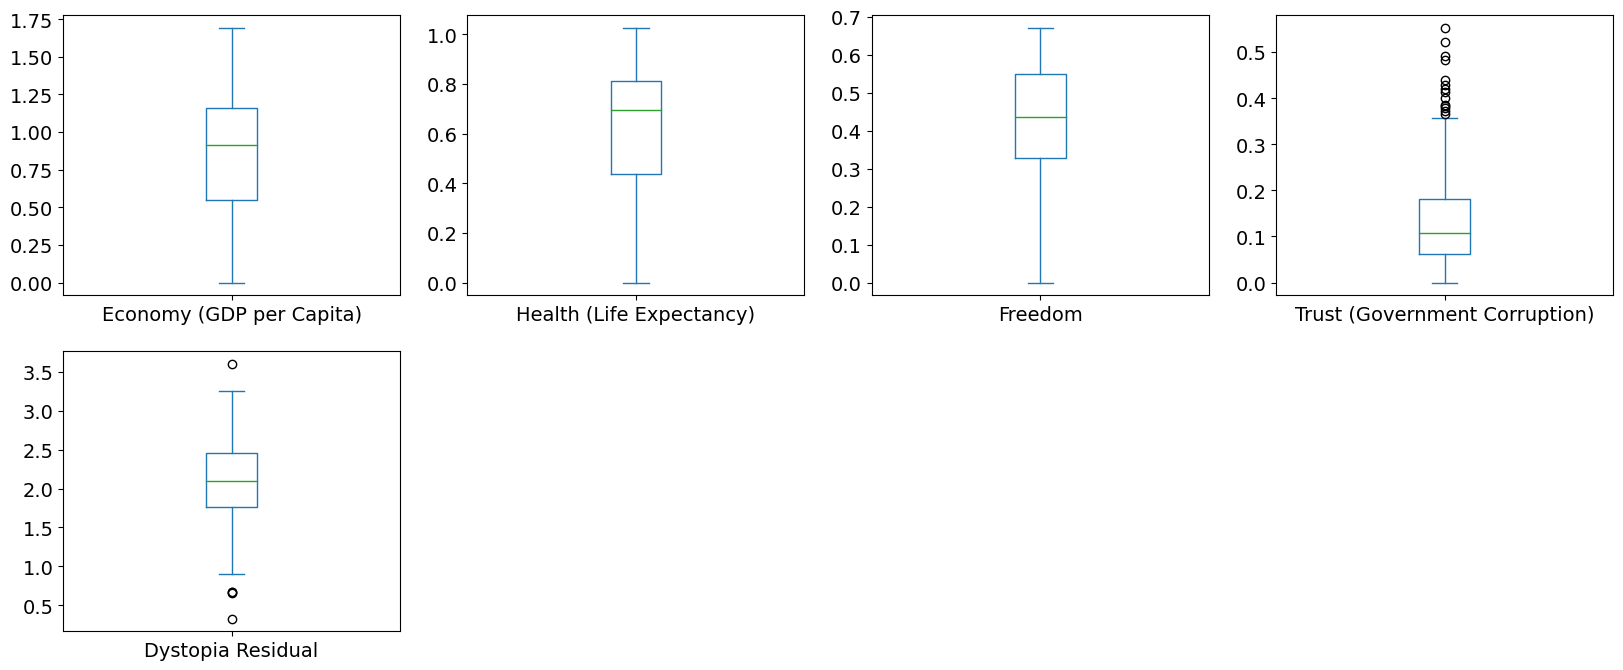

In [45]:
df_continuous.plot(kind="box",subplots=True,layout=(2,4),fontsize=14,figsize=(20,8))
plt.show()

Observations:
1. Trust (Government Corruption)' and 'Dystopia Residual' have few outliers
2. Remaining columns don't have outliers

# Removing Outliers using z-score method

In [46]:
# We don't remove outliers of categorical X columns and in target variable, hence removing outliers for continuous X features

In [47]:
df_continuous.columns

Index(['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')

In [48]:
df_continuous.shape

(158, 5)

In [49]:
df.shape

(158, 7)

In [50]:
x.shape

(158, 6)

In [51]:
y.shape

(158,)

In [52]:
# Calculating z score & identifying the rows and columns where absolute z score > 3
from scipy.stats import zscore
z=np.abs(zscore(df_continuous))
threshold=3
np.where(z>3)

(array([ 27, 153, 155], dtype=int64), array([3, 3, 4], dtype=int64))

In [53]:
# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_cont_n=df_continuous[(z<3).all(axis=1)]
x_new1=x[(z<3).all(axis=1)]
y_new1=y[(z<3).all(axis=1)]

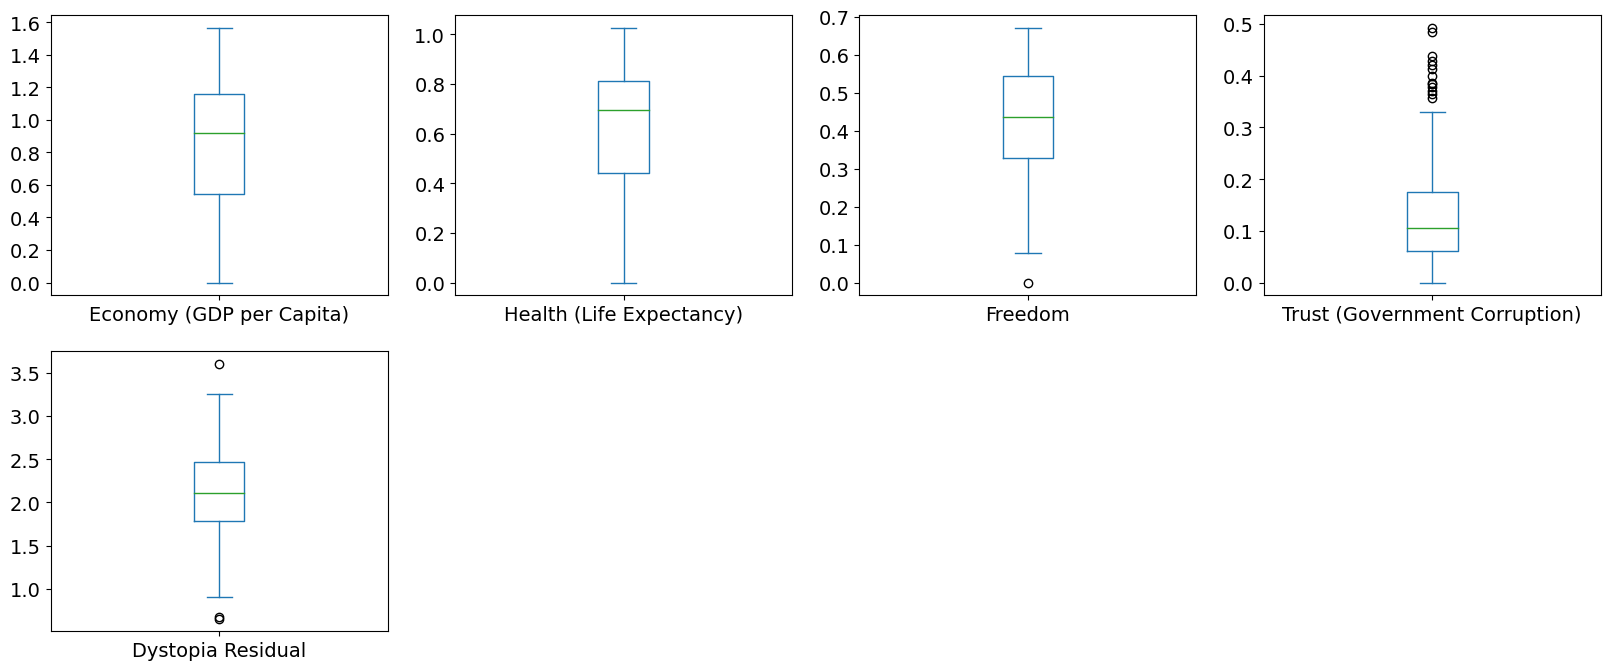

In [54]:
# Plotting features to check for outliers removal
df_cont_n.plot(kind="box",subplots=True,layout=(2,4),fontsize=14,figsize=(20,8))
plt.show()

Observations:
1. Outliers are removed from 'Trust (Government Corruption)'column

In [55]:
x_new1.shape

(155, 6)

In [56]:
y_new1.shape

(155,)

In [57]:
# Data loss calculation with z-score method
loss_percent_zscore=round((x.shape[0]-x_new1.shape[0])/x.shape[0]*100,1)
loss_percent_zscore

1.9

Observations:
1. Data loss with z-score method is 1.9%. Now I will check the dataloss using IQR method as well and will take a call accordingly

# Removing Outliers using IQR method

In [58]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_continuous.quantile(0.25)
Q3=df_continuous.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_continuous_upd = df_continuous[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
x_new2 = x[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]
y_new2 = y[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]

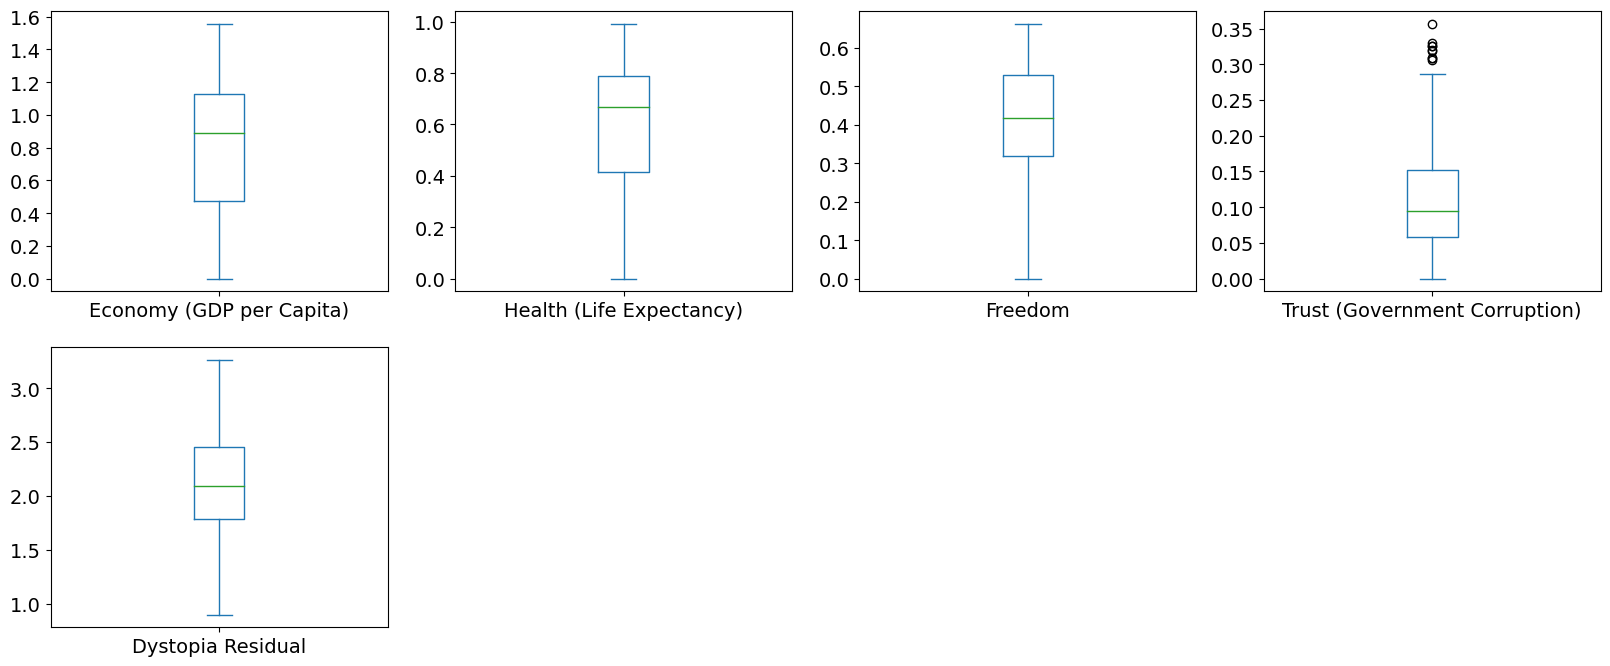

In [59]:
# Plotting features to check for outliers removal
df_continuous_upd.plot(kind="box",subplots=True,layout=(2,4),fontsize=14,figsize=(20,8))
plt.show()

Observations:
1. Outliers are removed from 'Trust (Government Corruption)'and ''Dystopia Residual' columns

In [60]:
x_new2.shape

(141, 6)

In [61]:
y_new2.shape

(141,)

In [62]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((x.shape[0]-x_new2.shape[0])/x.shape[0]*100,1)
display(loss_percent_IQR)

10.8

Observations: 
1. Data loss with IQR is 10.8% which is higher than data loss with z-score (1.9%), hence considering x & y data after removing outliers using zscore method for model building

In [63]:
x=x_new1
y=y_new1

# Skewness Check

In [64]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with continuous data 
# Segregating continuous X features to check skewness
x_continous=x.drop(['Happiness Rank'],axis=1)
# Checking skeweness and arranging the values in descending order
x_continous.skew().sort_values(ascending=False) 

Trust (Government Corruption)    1.298630
Dystopia Residual               -0.033565
Economy (GDP per Capita)        -0.371841
Freedom                         -0.410052
Health (Life Expectancy)        -0.701542
dtype: float64

Observations: 
1. Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are 4 variables beyond this range
2. I will apply various methods to remove skewness and will consider the one with lowest skewness 

# Transforming data to remove skewness

In [65]:
# Method1: Using BoxCox Method
from scipy.stats import boxcox
x1=pd.DataFrame()
for i in x_continous.columns:
    x1[i]=boxcox(x[i],0)
x1.skew().sort_values(ascending=False)

Dystopia Residual               -1.17036
Economy (GDP per Capita)             NaN
Health (Life Expectancy)             NaN
Freedom                              NaN
Trust (Government Corruption)        NaN
dtype: float64

Boxcox shows NaN values due to non-positive values in some columns

In [66]:
# Method2: Log transformation using numpy
import numpy as np
x2=pd.DataFrame()
for i in x_continous.columns:
    x2[i]=np.log(x[i])
x2.skew().sort_values(ascending=False)

Dystopia Residual               -1.17036
Economy (GDP per Capita)             NaN
Health (Life Expectancy)             NaN
Freedom                              NaN
Trust (Government Corruption)        NaN
dtype: float64

Log tranformation shows NaN values due to non-positive values in some columns

In [67]:
# Method 3: Using PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x_continous)
x3=pd.DataFrame(data=x_new_pt,columns=x_continous.columns)
x3.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.173902
Dystopia Residual                0.010087
Freedom                         -0.074444
Economy (GDP per Capita)        -0.146599
Health (Life Expectancy)        -0.184579
dtype: float64

Observations: Skewness range: (-0.19,+0.19)

In [68]:
# Method4: SquareRoot transformation using numpy
import numpy as np
x4=pd.DataFrame()
for i in x_continous.columns:
    x4[i]=np.sqrt(x[i])
x4.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.446772
Dystopia Residual               -0.531627
Economy (GDP per Capita)        -1.040239
Freedom                         -1.311325
Health (Life Expectancy)        -1.372229
dtype: float64

Observations: Skewness range: (-1.38,+1.38)

In [69]:
# Method5: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_new_qt=qt.fit_transform(x_continous)
x5=pd.DataFrame(data=x_new_qt,columns=x_continous.columns)
x5.skew().sort_values(ascending=False)

Economy (GDP per Capita)         2.713109e-15
Freedom                          0.000000e+00
Dystopia Residual               -4.134542e-14
Trust (Government Corruption)   -6.818350e-06
Health (Life Expectancy)        -7.254725e-06
dtype: float64

Observations: zero skewness for all the features

In [70]:
# Method6: Using Reciprocal transformation
#recip_resp=1/df["chlorides"]
#sns.distplot(recip_resp)
x6=pd.DataFrame()
for i in x_continous.columns:
    x6[i]=1/x[i]
x6.skew().sort_values(ascending=False)

Dystopia Residual                2.989088
Economy (GDP per Capita)              NaN
Health (Life Expectancy)              NaN
Freedom                               NaN
Trust (Government Corruption)         NaN
dtype: float64

Reciprocal shows NaN values due to zero values in some columns

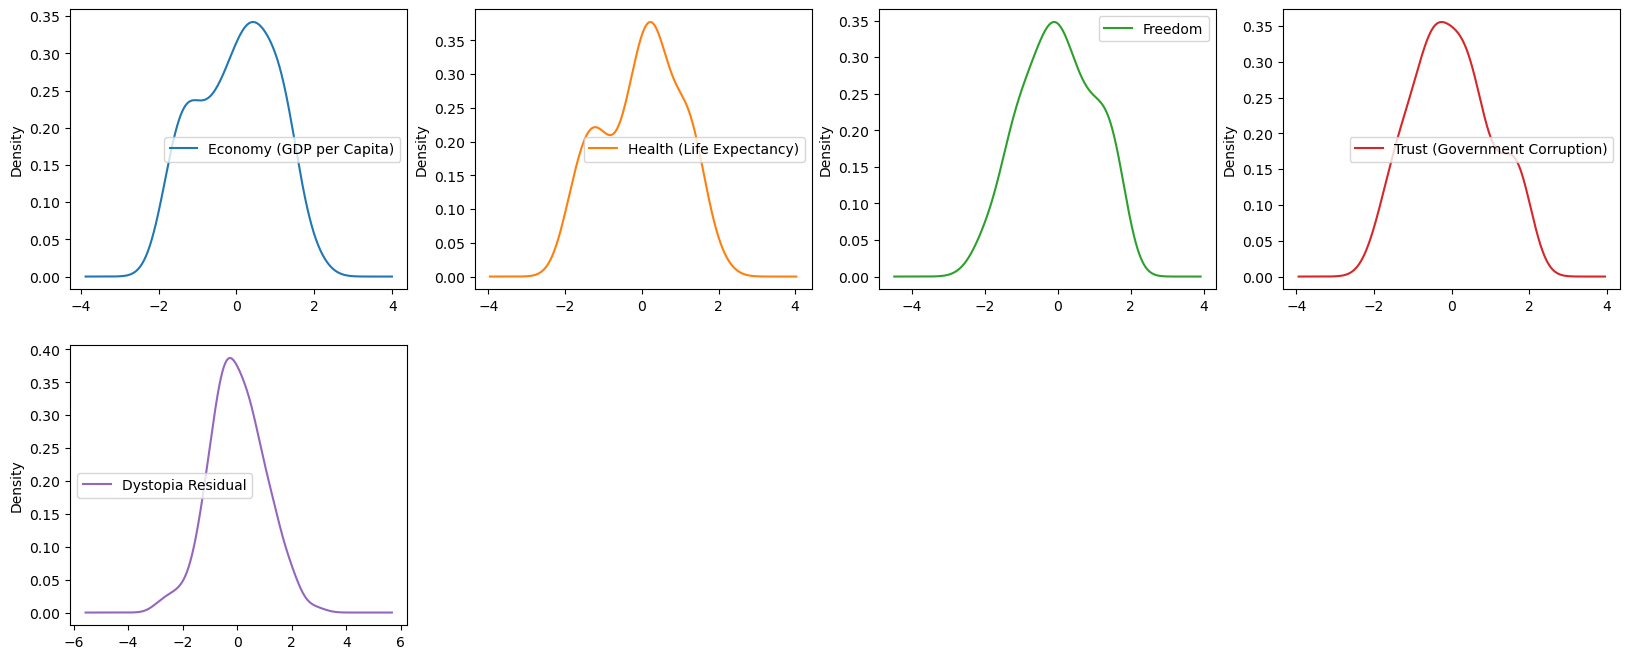

In [71]:
# Visually checking the distribution plots after skewness removal using powertransformer
x3.plot(kind='density',subplots=True,layout=(2,4),sharex=False,legend=True,fontsize=10,figsize=(20,8))
plt.show()

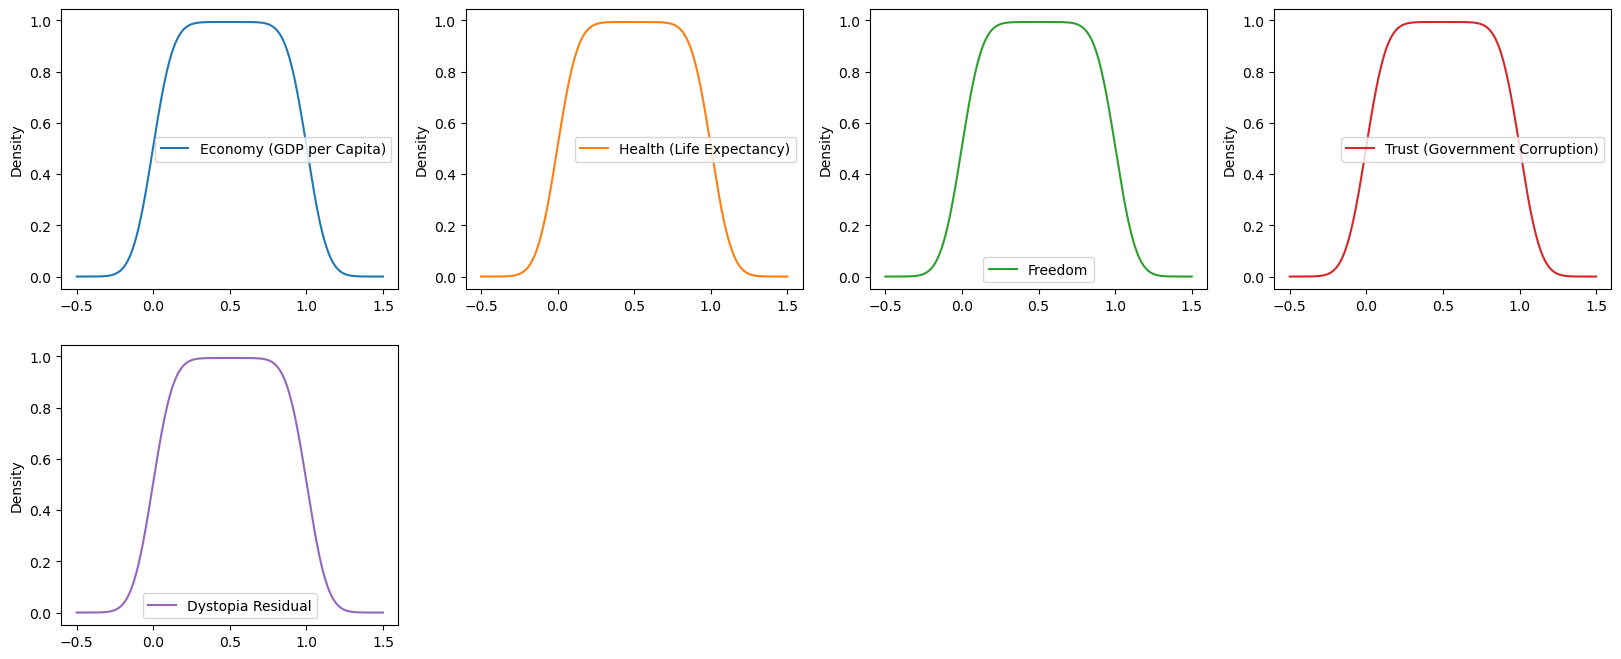

In [72]:
# Visually checking the distribution plots after skewness removal using quantile transformer
x5.plot(kind='density',subplots=True,layout=(2,4),sharex=False,legend=True,fontsize=10,figsize=(20,8))
plt.show()

Observations:
1. As the skewness is least using "quantile transformer", I am using transformed x data from "quantile transformer" for model building    

# Scaling data

In [73]:
# Applied standard scaler on continuous data as we typically don't scale categorical data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x5_scaled=sc.fit_transform(x5)
x_continuous=pd.DataFrame(data=x5_scaled,columns=x_continous.columns)
x_continuous

,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1.609165,1.542117,1.698563,1.631515,1.005728
1,1.273922,1.586816,1.430369,0.469340,1.206873
2,1.340970,1.072777,1.586815,1.698564,0.938679
3,1.653864,1.162175,1.720912,1.475069,0.849281
4,1.363320,1.340972,1.475068,1.430370,0.804582
...,...,...,...,...,...
150,-1.408019,-1.363321,-0.446990,0.335243,-1.385669
151,-1.251572,-1.251573,-1.363320,-0.111748,-0.379942
152,-1.273922,-1.206874,0.402291,-0.469340,-1.162174
153,-1.698563,-1.452719,-1.609165,-0.089398,-0.804582


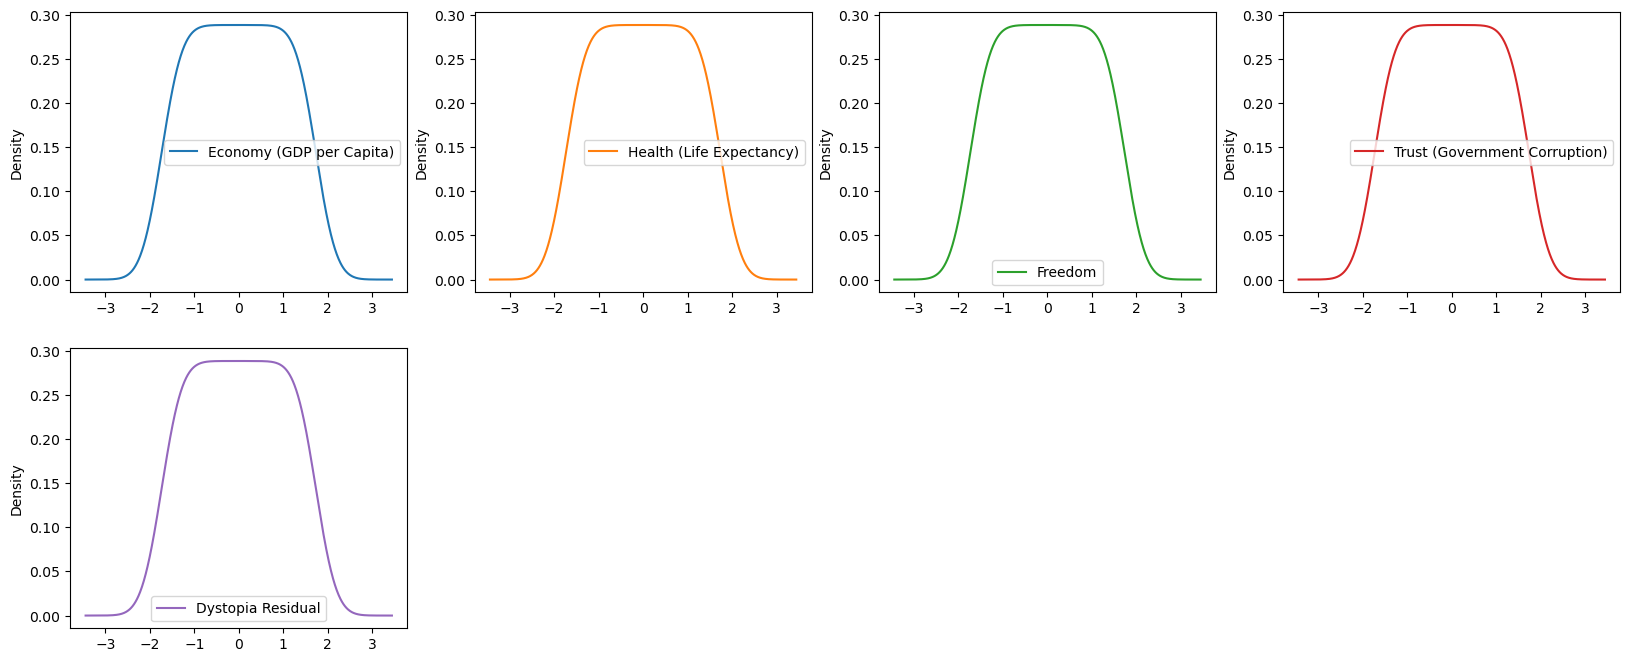

In [74]:
# Visually checking the distribution plots for continuous data after scaling the data
x_continuous.plot(kind='density',subplots=True,layout=(2,4),sharex=False,legend=True,fontsize=10,figsize=(20,8))
plt.show()

Observations: Scaled the data for all columns with mean=0 and standard deviation=+/- 1

In [75]:
x.columns

Index(['Happiness Rank', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Dystopia Residual'],
      dtype='object')

In [78]:
# Getting x_categorical data
x_cat=x[['Happiness Rank']].copy()
x_cat

,Happiness Rank
0,1
1,2
2,3
3,4
4,5
...,...
151,152
152,153
154,155
156,157


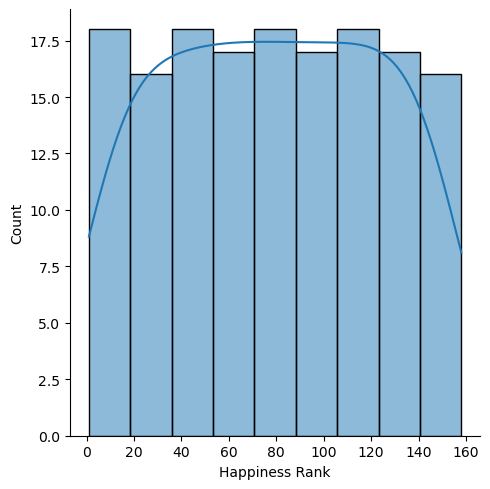

In [79]:
# Visually checking the distribution plot for "Happiness Rank"
sns.displot(x_cat["Happiness Rank"],kde=True)
plt.show()

Observations:
As the "Happiness Rank" has large numbers, I will apply scaling on this column as well eventhough it is categorical data to remove the bias in this column such that this column data will be scaled with mean=0 and standard deviation=+/-1. This would help to get the good model performance

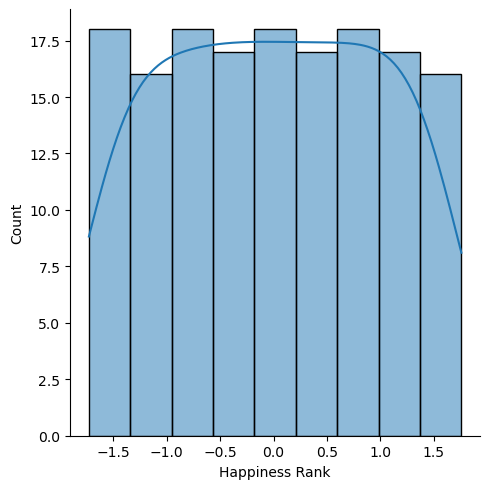

In [80]:
# Applied standard scaler on "Happiness Rank" 
x_cat_scaled=sc.fit_transform(x_cat)
x_categorical=pd.DataFrame(data=x_cat_scaled,columns=x_cat.columns)

# Visually checking the distribution plot for "Happiness Rank" after scaling
sns.displot(x_categorical["Happiness Rank"],kde=True)
plt.show()

Observations: Scaled the data for "Happiness Rank" with mean=0 and standard deviation=+/- 1

In [81]:
# Checking for the difference in index values between x continuous and x categorical data
(x_continuous.index.values==x_categorical.index.values).all()

True

Observations: Index values are same between x continuous and x categorical data hence I can combine them to get total x data

In [82]:
x_continuous

,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1.609165,1.542117,1.698563,1.631515,1.005728
1,1.273922,1.586816,1.430369,0.469340,1.206873
2,1.340970,1.072777,1.586815,1.698564,0.938679
3,1.653864,1.162175,1.720912,1.475069,0.849281
4,1.363320,1.340972,1.475068,1.430370,0.804582
...,...,...,...,...,...
150,-1.408019,-1.363321,-0.446990,0.335243,-1.385669
151,-1.251572,-1.251573,-1.363320,-0.111748,-0.379942
152,-1.273922,-1.206874,0.402291,-0.469340,-1.162174
153,-1.698563,-1.452719,-1.609165,-0.089398,-0.804582


In [83]:
# Adding both categorical and continuous x features to get the total x data for model building
x=pd.concat([x_categorical,x_continuous],axis=1)
x

,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,-1.728169,1.609165,1.542117,1.698563,1.631515,1.005728
1,-1.705970,1.273922,1.586816,1.430369,0.469340,1.206873
2,-1.683772,1.340970,1.072777,1.586815,1.698564,0.938679
3,-1.661574,1.653864,1.162175,1.720912,1.475069,0.849281
4,-1.639376,1.363320,1.340972,1.475068,1.430370,0.804582
...,...,...,...,...,...,...
150,1.623765,-1.408019,-1.363321,-0.446990,0.335243,-1.385669
151,1.645964,-1.251572,-1.251573,-1.363320,-0.111748,-0.379942
152,1.690360,-1.273922,-1.206874,0.402291,-0.469340,-1.162174
153,1.734757,-1.698563,-1.452719,-1.609165,-0.089398,-0.804582


In [84]:
x.isnull().sum()  # checking if any null values present in x to make sure "concat" operation is correct in the previous step

Happiness Rank                   0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64

In [85]:
x.shape

(155, 6)

In [86]:
y.shape

(155,)

In [87]:
# Checking for the difference in index values between x and y
(y.index.values==x.index.values).all()

False

In [88]:
# As the indexing is different between x and y data, I will update y index same as x
y_1=pd.DataFrame(data=y)  # Creating the dataframe with y data
# Updating y dataframe index same as x dataframe 
y_1["index"]=x.index.values  # Adding a new column in "y" with index values of "x"
y=y_1.set_index("index") # Changing the index column in "y" to get the same index values of "x" 

In [89]:
# Checking for the difference in index values between x and y
(y.index.values==x.index.values).all()

True

Observations: Index values are same between x and y hence I can use them for model building

In [90]:
x.shape

(155, 6)

In [91]:
y.shape

(155, 1)

# Model Building

Starting with "LinearRegression" as the target variable is continuous data

In [92]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


,Random State,Training R2 Score,Testing R2 Score,Difference in R2 Score
27,541,98.736969,98.737015,0.000046
25,501,98.774020,98.773803,0.000217
51,907,98.770748,98.771806,0.001059
12,226,98.757148,98.758273,0.001125
21,343,98.741397,98.742624,0.001227
...,...,...,...,...
47,853,98.759572,98.835736,0.076164
10,200,98.760102,98.838658,0.078556
3,80,98.746913,98.668124,0.078789
52,919,98.754098,98.835442,0.081344


Observations: From the above table, as multple random states give same training and testing r2 scores, taking one of this  from the below code

In [93]:
# Getting the best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BRS=np.array(RSN)[0]
BRS

541

Observation: Considering random state=541 for the model building 

In [94]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [95]:
# Training the model and checking  metrics with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.9873701500914586
Mean Absolute Error(MAE) :  0.09887322972432111
Mean Squared Error(MSE) :  0.012988597417595851
Root Mean Squared Error(RMSE) :  0.11396752790859269


# Cross Validation for Linear Regression

In [96]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation R2 Score,Model R2 Score,Difference in R2 Score
1,3,85.455815,98.737015,0.132812
0,2,77.956205,98.737015,0.207808
2,4,70.092467,98.737015,0.286445
3,5,50.794818,98.737015,0.479422
4,6,37.077705,98.737015,0.616593
5,7,10.146471,98.737015,0.885905
6,8,-5.812623,98.737015,1.045496
7,9,-9.212615,98.737015,1.079496
8,10,-46.127905,98.737015,1.448649


Observations: Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=3 from the above table

In [97]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
BCV

3

In [98]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: 85.45581525885027 
The model r2 score is: 98.73701500914585
Difference is: 0.13281199750295591


# Other Regression Algorithms

In [99]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# Defining the list with all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # Appending "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         # Appending "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          # Appending "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))# Appending "RMSE" to the list 
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("Table with performance of the models")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True)  # sorting the score table using the difference

Table with performance of the models


,Model,Model R2 Score,Cross Validation R2 Score,Difference in R2 Score,MAE,MSE,RMSE
6,Ridge(),98.798161,87.674320,0.111238,0.094793,0.012360,0.111175
0,LinearRegression(),98.737015,85.455815,0.132812,0.098873,0.012989,0.113968
3,SGDRegressor(),96.862771,32.816871,0.640459,0.150516,0.032263,0.179620
9,ExtraTreesRegressor(),99.820737,-113.574283,2.133950,0.028244,0.001844,0.042937
10,GradientBoostingRegressor(),99.903930,-133.436717,2.333406,0.023569,0.000988,0.031432
1,DecisionTreeRegressor(),99.486119,-138.986440,2.384726,0.049871,0.005285,0.072696
12,XGBRegressor(),99.150375,-146.205042,2.453554,0.070727,0.008738,0.093475
8,RandomForestRegressor(),99.782389,-147.999674,2.477821,0.029503,0.002238,0.047307
11,AdaBoostRegressor(),99.416855,-203.233911,3.026508,0.050495,0.005997,0.077441
2,KNeighborsRegressor(),94.265042,-239.976115,3.342412,0.197652,0.058979,0.242855


In [100]:
# Getting the best model where the least difference between cross validation score and model score
BMS=score_table["Model"][score_table["Difference in R2 Score"]==score_table["Difference in R2 Score"].min()]
BM=np.array(BMS)[0]
BM  # Best Model

'Ridge()'

Observations: 
1. Based on the comparison between model r2 score and cross validation scores for multiple models, I have considered "Ridge()" is the best model as the difference in r2 score is least among all the models. 
2. In this case, best model is chosen based on scoring parameter: r2_score
3. However, best model can change if I change scoring parameter to MSE or MAE or RMSE
4. Hyper parameter tuning will be pefromed for "Ridge()"

# Hyper Parameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for Ridge Regression
parameters = {
    'alpha':[0.001,0.005,0.01,0.1,0.5,1],
    'fit_intercept':[True,False],
    'copy_X':[True, False],
    'max_iter':[1000,5000,10000,15000],
    'tol':[1e-06,5e-06,1e-05,5e-05],
    'solver':['auto', 'svd','cholesky' 'lsqr', 'sparse_cg','sag','saga', 'lbfgs'],
    'positive':[True, False]
}

In [104]:
GCV=GridSearchCV(Ridge(),parameters,cv=10,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'positive': False,
 'solver': 'sag',
 'tol': 5e-05}

In [105]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=Ridge(alpha=GCV.best_params_['alpha'],fit_intercept=GCV.best_params_['fit_intercept'],
                                    copy_X=GCV.best_params_['copy_X'],max_iter=GCV.best_params_['max_iter'],
                                    tol=GCV.best_params_['tol'],solver=GCV.best_params_['solver'],positive=GCV.best_params_['positive'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)

print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred)))

Model : Linear Regression
R2 Score :  0.9874793353965382
Mean Absolute Error(MAE) :  0.09821531923341233
Mean Squared Error(MSE) :  0.012876310733124742
Root Mean Squared Error(RMSE) :  0.11347383281234816


In [106]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV R2 score is:",score*100,"\nThe model R2 score is:",r2_score(y_test,pred)*100)
print("Difference is:",r2_score(y_test,pred)-score)

The CV R2 score is: 85.99691521581471 
The model R2 score is: 98.74793353965381
Difference is: 0.12751018323839114


Observations for Ridge Regression: 
1. Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is   0.12751
2. Model with default parameters: The difference between Cross Validation Score and model score is 0.11123
3. As the delta is least in the model with default parameters and also the r2 score is slightly high, considering the model with default parameters as the best model for saving

# Save Model

In [107]:
import pickle
filename='World_Happiness_Report.pkl'
pickle.dump(models[5][1], open(filename,'wb'))  # saving the Ridge Regression model

# Conclusion

In [108]:
loaded_model=pickle.load(open('World_Happiness_Report.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)
Predicted=loaded_model.predict(x_test)
Original=np.array(y_test)
Predicted_df=pd.DataFrame(data=Predicted,columns=["Predicted"])
Original_df=pd.DataFrame(data=Original,columns=["Original"])
conclusion=pd.concat([Predicted_df,Original_df],axis=1)
conclusion

98.7981608110865


,Predicted,Original
0,6.760319,6.798
1,4.379791,4.517
2,7.441916,7.587
3,5.813580,5.791
4,5.356234,5.268
5,7.127686,7.286
6,6.230707,6.123
7,6.955547,6.901
8,5.039759,5.098
9,4.899474,4.949
